In [1]:
# Load Pandas library
import pandas as pd

#Load numpy library
import numpy as np

#import MatPlotLib
import matplotlib as mpl 

#Import PyPlot in MatPlotLib
import matplotlib.pyplot as plt 

#Import SciKitLearn decomposition PCA library
from sklearn.decomposition import PCA

#Import SciKitLearn dataset 
from sklearn import datasets as ds

#Helps create 80/20 split 
from sklearn.model_selection import ShuffleSplit

#Logistic Regression
from sklearn.linear_model import LogisticRegression

#Allows for meterics to be found after Logistic Regression
from sklearn import metrics as mt

#Create KFolds for CV_Object
from sklearn.model_selection import KFold

#Creates Standard Scaler Variables
from sklearn.preprocessing import StandardScaler

#Support Vector Machine
from sklearn.svm import SVC


#Seaborn 
import seaborn as sb

#Magics for inline code.
%matplotlib inline

#Create Zillow Data Frame using Read_CSV
# read in the csv file
dfZillowData = pd.read_csv('/users/cmirwin/desktop/Smu Data Sets/Data Mining/ZillowData/Properties_2016.csv') 

dfTrainingData = pd.read_csv('/users/cmirwin/desktop/Smu Data Sets/Data Mining/ZillowData/train_2016.csv')


#Create new data set that contains both the data zillow and the data to train against
dfFullTestData = pd.merge(dfTrainingData, dfZillowData, on='parcelid', how='left')

#Remove 2.9 million records from memory
del dfZillowData


#Get the headers to ensure all columns are included.
dfFullTestData.head(10)

/Users/cmirwin/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13
5,11509835,-0.2705,2016-01-02,1.0,NaN,NaN,4.0,4.0,NaN,1.0,...,NaN,NaN,880650.0,2447951.0,2015.0,1567301.0,27126.57,NaN,NaN,6.037621e+13
6,12286022,0.0440,2016-01-02,NaN,NaN,NaN,1.0,2.0,NaN,7.0,...,NaN,NaN,64549.0,111521.0,2015.0,46972.0,2304.97,NaN,NaN,6.037542e+13
7,17177301,0.1638,2016-01-02,NaN,NaN,NaN,2.5,3.0,NaN,NaN,...,2.0,NaN,107000.0,306000.0,2015.0,199000.0,3745.50,NaN,NaN,6.111003e+13
8,14739064,-0.0030,2016-01-02,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,NaN,NaN,66834.0,210064.0,2015.0,143230.0,2172.88,NaN,NaN,6.059042e+13
9,14677559,0.0843,2016-01-03,NaN,NaN,NaN,2.0,2.0,NaN,NaN,...,1.0,NaN,109977.0,190960.0,2015.0,80983.0,1940.26,NaN,NaN,6.059063e+13


In [2]:
#We can see that a number of the data columns have NaN values that were assigned during import
#we choose to replace those values with the median values for the variable.

#Create new columns with highest missing values as True/False.
#print(dfMajorityOfDataMissing)

dfFullTestData['hasbasement'] = dfFullTestData[['basementsqft']].where(dfFullTestData[['basementsqft']].isnull(), 1).fillna(0).astype(int)

dfFullTestData['hasdeck'] = dfFullTestData[['yardbuildingsqft26']].where(dfFullTestData[['yardbuildingsqft26']].isnull(), 1).fillna(0).astype(int)

dfFullTestData['hasfireplace'] = dfFullTestData[['fireplaceflag']].where(dfFullTestData[['fireplaceflag']].isnull(), 1).fillna(0).astype(int)

dfFullTestData['hashottuborspa'] = dfFullTestData[['hashottuborspa', 'pooltypeid2']].where(dfFullTestData[['hashottuborspa','pooltypeid2']].isnull(), 1).fillna(0).astype(int)

dfFullTestData['haspatio'] = dfFullTestData[['yardbuildingsqft17']].where(dfFullTestData[['yardbuildingsqft17']].isnull(), 1).fillna(0).astype(int)

#Create Function for County Rename
def rename(row):
    if row['regionidcounty'] == 1286:
        val = 'Ventura County'
    elif row['regionidcounty'] == 3101:
        val = 'Los Angles County'
    else:
        val = 'Orange County'
    return val

dfFullTestData['countyname'] = dfFullTestData.apply(rename, axis=1)

print 'worked again'

worked again


In [3]:
#Create New data frame for everything
dfForModel = dfFullTestData.replace(to_replace='NaN',value= np.nan) 

#Get median values for based on original values
dfMedians = pd.DataFrame(dfFullTestData.median())

#Add Column Name to Medians DataFrame
dfMedians.columns = ['medianvalue']

#Create custom updates
dfColumns = pd.DataFrame(pd.Series([1.,0.,0.
                                    ,0.,0.,0.
                                    ,0.,0.,0.
                                    ,13.,5.,0.
                                    ,24.,0.,0.
                                    ,0.,0.,0.
                                    ,0.]
              , index=['numberofstories', 'bathroomcnt','bedroomcnt'
                      ,'fireplacecnt','fullbathcnt','garagecarcnt'
                      , 'poolcnt', 'roomcnt','unitcnt'
                      , 'heatingorsystemtypeid','airconditioningtypeid', 'garagetotalsqft'
                      , 'storytypeid', 'basementsqft', 'finishedsquarefeet13'
                      , 'finishedsquarefeet6','finishedsquarefeet15','finishedsquarefeet50'
                      , 'finishedfloor1squarefeet']))


#Set Column Name
dfColumns.columns = ['updatevalue']


#Create Merged Data set with values of both medians and custom
dfMerged = pd.concat([dfMedians, dfColumns], axis=1, join_axes=[dfMedians.index])

#Create new column of data that is custom values filled with median for any null
dfMerged['values'] = dfMerged['updatevalue'].fillna(dfMerged['medianvalue'])

#Apply median values to the overall data set
dfForModel = dfForModel.fillna(dfMerged['values'])

#Create smaller data set for descriptive stats section
dfDataForStats = dfForModel[['bathroomcnt',
                               'bedroomcnt',
                               'finishedfloor1squarefeet',
                               'calculatedfinishedsquarefeet',
                               'finishedsquarefeet15',
                               'lotsizesquarefeet',
                               'taxvaluedollarcnt',
                               'structuretaxvaluedollarcnt',
                               'landtaxvaluedollarcnt',
                               'taxamount']]

dfDataForStats.describe()


,bathroomcnt,bedroomcnt,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet15,lotsizesquarefeet,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
count,90811.000000,90811.000000,90811.000000,90811.000000,90811.000000,9.081100e+04,9.081100e+04,9.081100e+04,9.081100e+04,90811.000000
mean,2.266020,3.013974,101.768618,1770.112310,93.409840,2.653193e+04,4.569938e+05,1.796083e+05,2.778305e+05,5975.374056
std,1.016413,1.176174,398.691906,922.408353,508.302478,1.145533e+05,5.533113e+05,2.081280e+05,3.993632e+05,6819.341095
min,0.000000,0.000000,0.000000,2.000000,0.000000,1.670000e+02,2.200000e+01,1.000000e+02,2.200000e+01,49.080000
25%,2.000000,2.000000,0.000000,1189.000000,0.000000,5.973000e+03,1.999335e+05,8.178800e+04,8.291150e+04,2884.155000
50%,2.000000,3.000000,0.000000,1540.000000,0.000000,7.200000e+03,3.428720e+05,1.320000e+05,1.929700e+05,4542.750000
75%,3.000000,4.000000,0.000000,2084.000000,0.000000,1.032850e+04,5.383630e+05,2.093270e+05,3.440000e+05,6881.865000
max,20.000000,16.000000,7625.000000,22741.000000,22741.000000,6.971010e+06,2.775000e+07,9.948100e+06,2.450000e+07,321936.090000


In [4]:
#Create dummy variables for all TypeId columns
#This section takes a long time due to the fact that we are creating 
#so many additional variables by 3 million records. 

#heatingorsystemtypeid
#Create dynamic Name
dummies = pd.get_dummies(dfForModel['heatingorsystemtypeid']).rename(columns=lambda x: 'HSTypeId_' + str(x))
#Join to Dataframe for Model
dfForModel = pd.concat([dfForModel, dummies], axis=1)

#Delete from model 
#dfForModel.drop(['heatingorsystemtypeid'], inplace=True, axis=1)

#Repeat of code above
#airconditioningtypeid
dummies = pd.get_dummies(dfForModel['airconditioningtypeid']).rename(columns=lambda x: 'ACTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['airconditioningtypeid'], inplace=True, axis=1)

#architecturalstyletypeid
dummies = pd.get_dummies(dfForModel['architecturalstyletypeid']).rename(columns=lambda x: 'ArchStyleTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['architecturalstyletypeid'], inplace=True, axis=1)

#decktypeid
dummies = pd.get_dummies(dfForModel['decktypeid']).rename(columns=lambda x: 'DeckTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['decktypeid'], inplace=True, axis=1)

#buildingclasstypeid
dummies = pd.get_dummies(dfForModel['buildingclasstypeid']).rename(columns=lambda x: 'BuildClassTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['buildingclasstypeid'], inplace=True, axis=1)

#typeconstructiontypeid
dummies = pd.get_dummies(dfForModel['typeconstructiontypeid']).rename(columns=lambda x: 'ConstructionTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['typeconstructiontypeid'], inplace=True, axis=1)

#buildingqualitytypeid
dummies = pd.get_dummies(dfForModel['buildingqualitytypeid']).rename(columns=lambda x: 'BuildingQualTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['buildingqualitytypeid'], inplace=True, axis=1)

#propertylandusetypeid
dummies = pd.get_dummies(dfForModel['propertylandusetypeid']).rename(columns=lambda x: 'LandUseTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['propertylandusetypeid'], inplace=True, axis=1)

#Create Function for County Rename
def garagecnt(row):
    if row['garagecarcnt'] > 0:
        val = 1
    else:
        val = 0
    return val

dfForModel['hasgarage'] = dfForModel.apply(garagecnt, axis=1)


#Find out what data types are in the Data set
dfDataTypes = pd.DataFrame(dfForModel)

#Create Numeric Only Dataframe
dfZillowDataNumeric = dfDataTypes.select_dtypes(['float64','int64'])
 
print 'complete again'

complete again


In [5]:
#Create Cross Validation object and Test and train values
# we want to predict if a house has a garage
if 'hasgarage' in dfZillowDataNumeric:
    
    #Get the values for each property
    actualValues = dfZillowDataNumeric['hasgarage'].values 
    
    # get rid of the hasgarage variable
    del dfZillowDataNumeric['hasgarage'] 

    #delete any variables that give the model the possible anwser
    del dfZillowDataNumeric['garagecarcnt']

    # Gather all values to use for prediction
    additionalVars = dfZillowDataNumeric.values    


print 'groups created'

groups created


In [7]:

# Create cross validation with KFolds object
num_cv_iterations = 3
#Create Cross Validation objects using folds
cv_object = KFold(n_splits=num_cv_iterations, random_state=None, shuffle=True)
cv_object.get_n_splits(additionalVars)

#Create X and Y Train and Test Groups. 

for train_index, test_index in cv_object.split(additionalVars):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = additionalVars[train_index], additionalVars[test_index]
    y_train, y_test = actualValues[train_index], actualValues[test_index]
    
print 'Test and Train Data Created'

#This section scales the data in order to create a more useable data set
# scale attributes by the training set
stdsclrObj = StandardScaler()

# find scalings for each column that make this zero mean and unit std
#We use the training data to help fit the standard dev
stdsclrObj.fit(X_train) # find scalings for each column that make this zero mean and unit std

# to transform new feature data
# apply to training
X_train_scaled = stdsclrObj.transform(X_train)

# apply those means and std to the test set (without snooping at the test set values)
X_test_scaled = stdsclrObj.transform(X_test) 

print 'Scaled Data created'

#Run Support Vector Machine
from matplotlib import pyplot as svmplt
%matplotlib inline
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
#more info on Support Vector Machines is at the website below.
#https://www.analyticsvidhya.com/blog/2015/10/understaing-support-vector-machine-example-code/


#change between the Kernal test ‘rbf’, ‘poly’, 'linear', ‘sigmoid’
#only linear will produce a graph below. 
kernelTest = 'linear'

#gamma: Kernel coefficient for . Higher the value of gamma
#will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.
#gammaLevel needs to be a float can also be auto
#altering this from Auto will create much longer run times.
gammaLevel = 'auto'

#C is the cost variable 
#Penalty parameter C of the error term. 
#It also controls the trade off between smooth decision boundary and classifying the training points correctly.
cost = 0.05

supportVectorCLF = SVC(C=cost, kernel=kernelTest, degree=3, gamma=gammaLevel) # get object
supportVectorCLF.fit(X_train_scaled, y_train)  # train object

y_hat = supportVectorCLF.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)


('TRAIN:', array([    1,     2,     3, ..., 90802, 90806, 90810]), 'TEST:', array([    0,     4,    11, ..., 90807, 90808, 90809]))
('TRAIN:', array([    0,     1,     2, ..., 90808, 90809, 90810]), 'TEST:', array([    3,     5,     7, ..., 90791, 90798, 90806]))
('TRAIN:', array([    0,     3,     4, ..., 90807, 90808, 90809]), 'TEST:', array([    1,     2,     6, ..., 90801, 90802, 90810]))
Test and Train Data Created
Scaled Data created
('accuracy:', 0.98860257680872154)
[[20093   297]
 [   48  9832]]


('index value of ', 0, 'Variable Name: ', 'calculatedbathnbr', 'has weight of', -0.96898934565388906)
('index value of ', 1, 'Variable Name: ', 'regionidcounty', 'has weight of', -0.75094393661702252)
('index value of ', 2, 'Variable Name: ', 'LandUseTypeId_261.0', 'has weight of', -0.49020004363261555)
('index value of ', 3, 'Variable Name: ', 'poolsizesum', 'has weight of', -0.06850773385815119)
('index value of ', 4, 'Variable Name: ', 'LandUseTypeId_265.0', 'has weight of', 0.058281177273712834)
('index value of ', 5, 'Variable Name: ', 'hasdeck', 'has weight of', 0.062359163224671978)
('index value of ', 6, 'Variable Name: ', 'HSTypeId_6.0', 'has weight of', 0.068039715735871656)
('index value of ', 7, 'Variable Name: ', 'yardbuildingsqft17', 'has weight of', 0.077417247743559639)
('index value of ', 8, 'Variable Name: ', 'propertylandusetypeid', 'has weight of', 0.08555897150439859)
('index value of ', 9, 'Variable Name: ', 'LandUseTypeId_248.0', 'has weight of', 0.11662801977751

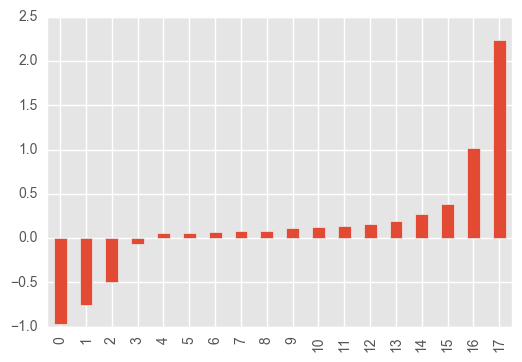

('Support Vector Total: ', (1507, 109))
('Support Vector Indices: ', (1507,))
('Number of Support Vectors Per Class: ', array([717, 790], dtype=int32))
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1507 entries, 134 to 90673
Columns: 110 entries, parcelid to hasgarage
dtypes: float64(103), int64(7)
memory usage: 1.3 MB


/Users/cmirwin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
if kernelTest == 'linear':
    #Print results of last run.
    # combine attributes
    coefValues = zip(supportVectorCLF.coef_.T,dfZillowDataNumeric.columns) 

    # sort these attributes and spit them out
    coefValues = pd.DataFrame(sorted(coefValues))

    #keep all columns from dataframe with absolute values of .05 
    dfValuesGTfive = coefValues.loc[abs(coefValues[0]) > .05]

    #Reset Index from removing data
    dfValuesGTfive = dfValuesGTfive.reset_index(drop=True)

    #Remove any duplicate values from multiple runs
    dfValuesGTfive = dfValuesGTfive.drop_duplicates([1], keep='last')

    # iterate over the Variable values
    #Get weight values
    weights = dfValuesGTfive[0] 
    #Get Variable Names
    variable_names = dfValuesGTfive[1]
    #Get Index count
    indexes = dfValuesGTfive.index
    #Combined the data set and then print out results
    for index, weight, name in zip(indexes, weights,variable_names):
        print('index value of ', index , 'Variable Name: ', name, 'has weight of', weight[0])

    #Due to the large number of variables we choose an absolute value of .15 as a cut off
    #Show all variables with an absolute value of greater than .15
    plt.style.use('ggplot')
    #The commented line below give the correct labels, but not the correct values.
    #plotweights = pd.Series(dfValuesGTfive[0].astype(float), index=variable_names)
    SVMweights = pd.Series(dfValuesGTfive[0].astype(float))
    SVMweights.plot(kind='bar')
    plt.show()
else:
        print 'No coefficient Data due to Kernal Type'

# look at the support vectors

#Support Vectors
print('Support Vector Total: ' , supportVectorCLF.support_vectors_.shape)

#Indices of support vectors
print('Support Vector Indices: ' , supportVectorCLF.support_.shape)

#Number of support vectors for each class.
print('Number of Support Vectors Per Class: ' ,supportVectorCLF.n_support_ )

/Users/cmirwin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cmirwin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1507 entries, 134 to 90673
Columns: 110 entries, parcelid to hasgarage
dtypes: float64(103), int64(7)
memory usage: 1.3 MB


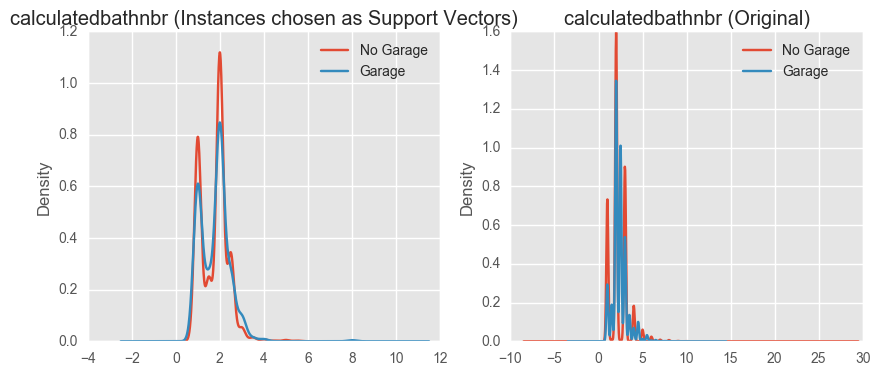

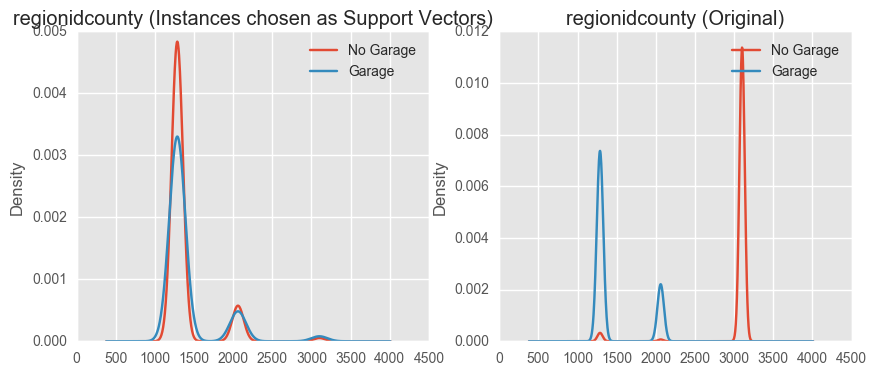

In [20]:


df_tested_on = dfZillowDataNumeric.iloc[train_index] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[supportVectorCLF.support_,:]

df_support['hasgarage'] = actualValues[supportVectorCLF.support_] # add back in the 'Survived' Column to the pandas dataframe
dfZillowDataNumeric['hasgarage'] = actualValues # also add it back in for the original data
df_support.info()

# now lets see the statistics of these attributes
from pandas.tools.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['hasgarage'])
df_grouped = dfZillowDataNumeric.groupby(['hasgarage'])

# plot KDE of Different variables
vars_to_plot = ['calculatedbathnbr', 'regionidcounty']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['No Garage','Garage'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['No Garage','Garage'])
    plt.title(v+' (Original)')